In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seed for reproducibility
np.random.seed(42)

# Number of rows for the dataset
num_rows = 1000

#  random values for each feature
E = np.random.uniform(0.1, 20, num_rows)  # Monetary index (wealth)
dE_dt = np.random.uniform(-5, 5, num_rows)  # Rate of change of wealth (greed)
LP = np.random.uniform(0, 10, num_rows)  # Loyalty points
D = np.random.uniform(0, 1, num_rows)  # Discrimination Factor
B = np.random.uniform(0, 1, num_rows)  # Bonding with Administration
R = np.random.uniform(0, 1, num_rows)  # Recognition and Benefits
n = np.random.randint(0, 5, num_rows)  # Number of military members in the family
k = np.random.randint(0, 3, num_rows)  # Number of disloyal members in the family
A = np.random.randint(0, 20, num_rows)  # Number of battles fought
D_dependents = np.random.randint(0, 5, num_rows)  # Number of dependents
p = np.random.randint(0, 10, num_rows)  # Number of defected peers

# Calculating features
Contentment = (D + B + R) / 3  # Contentment Index
Family_Influence = np.exp(n) / (2 ** k)  # Family background influence
Safety = A / (2 ** D_dependents)  # Fear/Personal Safety influence
Peer_Influence = np.exp(-p)  # Peer group influence

# Normalizing features
scaler = MinMaxScaler()
E_norm = scaler.fit_transform(E.reshape(-1, 1))
dE_dt_norm = scaler.fit_transform(dE_dt.reshape(-1, 1))
LP_norm = scaler.fit_transform(LP.reshape(-1, 1))
Family_Influence_norm = scaler.fit_transform(Family_Influence.reshape(-1, 1))
Safety_norm = scaler.fit_transform(Safety.reshape(-1, 1))
Peer_Influence_norm = scaler.fit_transform(Peer_Influence.reshape(-1, 1))


labels = np.random.choice(['Yes', 'No'], size=num_rows)  # Randomly assigns 'Yes' or 'No'

# Create a dataframe
data = {
    'Monetary_Index_E': E_norm.flatten(),
    'Greed_dE_dt': dE_dt_norm.flatten(),
    'Loyalty_LP': LP_norm.flatten(),
    'Contentment': Contentment,
    'Family_Influence': Family_Influence_norm.flatten(),
    'Safety': Safety_norm.flatten(),
    'Peer_Influence': Peer_Influence_norm.flatten(),
    'Betrayal_Label': labels
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

# Save the dataset to a CSV file
df.to_csv('soldier_betrayal_dataset_random.csv', index=False)
df


   Monetary_Index_E  Greed_dE_dt  Loyalty_LP  Contentment  Family_Influence  \
0          0.371735     0.182609    0.262269     0.546111          0.000000   
1          0.950755     0.540740    0.247509     0.691850          0.013800   
2          0.730954     0.873049    0.908233     0.621725          0.063379   
3          0.596960     0.731791    0.250082     0.372926          1.000000   
4          0.152134     0.806411    0.272535     0.530215          1.000000   

     Safety  Peer_Influence Betrayal_Label  
0  0.473684        0.006615             No  
1  0.171053        0.018194            Yes  
2  0.842105        0.135229             No  
3  0.684211        0.018194            Yes  
4  0.052632        0.000789             No  


,Monetary_Index_E,Greed_dE_dt,Loyalty_LP,Contentment,Family_Influence,Safety,Peer_Influence,Betrayal_Label
0,0.371735,0.182609,0.262269,0.546111,0.000000,0.473684,0.006615,No
1,0.950755,0.540740,0.247509,0.691850,0.013800,0.171053,0.018194,Yes
2,0.730954,0.873049,0.908233,0.621725,0.063379,0.842105,0.135229,No
3,0.596960,0.731791,0.250082,0.372926,1.000000,0.684211,0.018194,Yes
4,0.152134,0.806411,0.272535,0.530215,1.000000,0.052632,0.000789,No
...,...,...,...,...,...,...,...,...
995,0.087379,0.656234,0.867184,0.674647,0.007904,0.157895,0.000789,No
996,0.917189,0.957037,0.157607,0.319001,0.029389,0.029605,0.367801,No
997,0.132839,0.065991,0.310456,0.495855,1.000000,0.026316,1.000000,Yes
998,0.950275,0.054042,0.290671,0.610326,0.131358,0.157895,0.000789,Yes


              precision    recall  f1-score   support

           0       0.56      0.57      0.56       165
           1       0.46      0.45      0.46       135

    accuracy                           0.52       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.52      0.52      0.52       300

            Feature  Importance
2        Loyalty_LP    0.175412
1       Greed_dE_dt    0.174927
3       Contentment    0.168396
0  Monetary_Index_E    0.164400
5            Safety    0.128692
4  Family_Influence    0.098684
6    Peer_Influence    0.089489


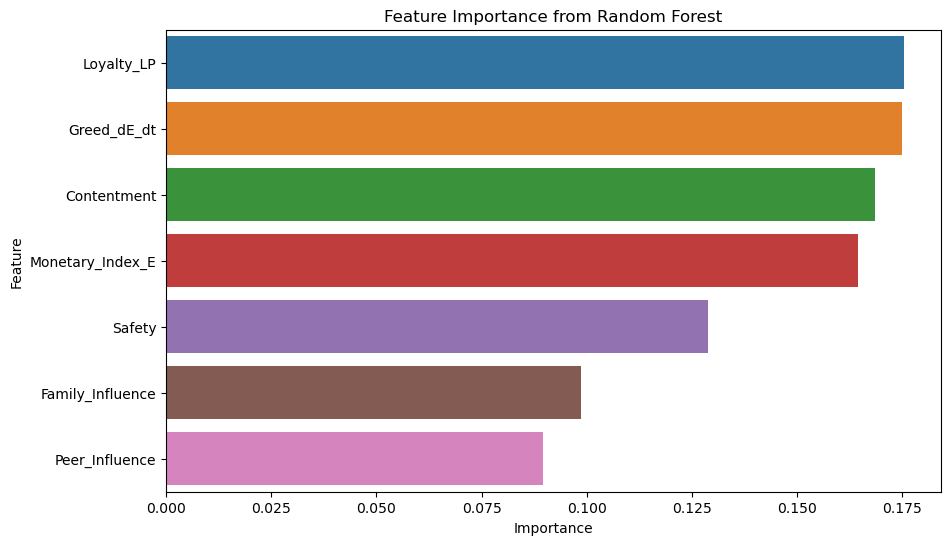

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('soldier_betrayal_dataset_random.csv')

# Encoding the labels ('Yes' -> 1, 'No' -> 0)
label_encoder = LabelEncoder()
df['Betrayal_Label'] = label_encoder.fit_transform(df['Betrayal_Label'])

# Separating features and target
X = df.drop(columns=['Betrayal_Label'])
y = df['Betrayal_Label']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

#  (weightage of each feature)
feature_importances = rf_model.feature_importances_

# Creating dataframe for feature importance
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df)

# Ploing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
